In [1]:
import cv2
import os
from matplotlib import pyplot as plt
from skimage.morphology import skeletonize

SEGM_DIR = "C:\\Users\\viscom\\workspace\\tree_project\\tree_images\\UrbanStreet\\segmentation\\VOC2012\\SegmentationClass"

ROOT_DIR = os.path.dirname(os.path.abspath(''))
ROOT_DIR_GIS = os.path.join(ROOT_DIR, 'Google-Image-Scraper')
DIR_TREE_SMALL = os.path.join(ROOT_DIR_GIS, 'photos', 'test_small', 'single tree image hd')

In [5]:
from build_dataset import get_files_folder

In [9]:
# https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py

from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T


plt.rcParams["savefig.bbox"] = 'tight'
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
# torch.manual_seed(0)


def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

In [47]:
custom = T.Compose([
    T.ColorJitter(brightness=.5, contrast=0.3, saturation=.3, hue=.05),
    T.RandomHorizontalFlip(p=0.7),
    T.RandomPerspective(distortion_scale=0.3, p=0.5)
])

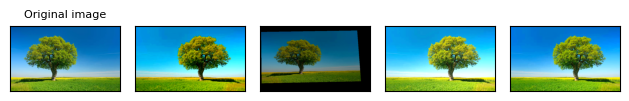

In [50]:
transf_imgs = [custom(orig_img) for _ in range(4)]
plot(transf_imgs)

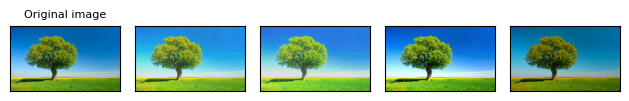

In [38]:
jitter = T.ColorJitter(brightness=.5, contrast=0.3, saturation=.3, hue=.05)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)

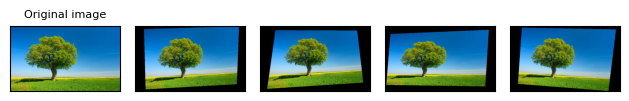

In [46]:
perspective_transformer = T.RandomPerspective(distortion_scale=0.3, p=1.0)
perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
plot(perspective_imgs)

### TrivialAugment
- Good: no params needed
- Bad: also includes rotation, too much distortion

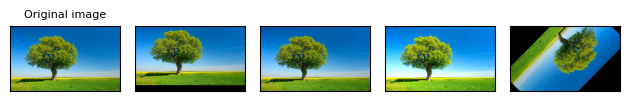

In [24]:
image_list = get_files_folder(DIR_TREE_SMALL)

orig_img = Image.open(image_list[1])

augmenter = T.TrivialAugmentWide(num_magnitude_bins=5)
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

(-0.5, 1599.5, 1199.5, -0.5)

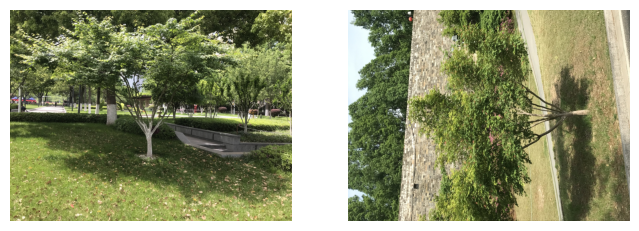

In [2]:
from PIL import Image
SEGM_DIR = "C:\\Users\\viscom\\workspace\\tree_project\\tree_images\\UrbanStreet\\classification\\train\\Acer palmatum"
img1 = Image.open(os.path.join(SEGM_DIR,"Acer palmatum_tree_1 (5).jpg"))
img2 = Image.open(os.path.join(SEGM_DIR,"Acer palmatum_tree_1 (6).jpg"))

# Plot all the images
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(img1, cmap=plt.cm.gray)
ax[0].axis('off')
ax[1].imshow(img2, cmap=plt.cm.gray)
ax[1].axis('off')

In [5]:
from build_dataset import image_resize

c:\Users\viscom\workspace\tree_project\ControlNet-Trees\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
img_path = os.path.join(SEGM_DIR,"Prunus cerasifera f. atropurpurea_tree_1 (1).jpg")
img_path.replace(".jpg", ".png")
#  + ".png"

'C:\\Users\\viscom\\workspace\\tree_project\\tree_images\\UrbanStreet\\segmentation\\VOC2012\\SegmentationClass\\Prunus cerasifera f. atropurpurea_tree_1 (1).png'

In [6]:
img1 = cv2.imread(os.path.join(SEGM_DIR,"Acer palmatum_tree_1 (5).jpg"))
img2 = cv2.imread(os.path.join(SEGM_DIR,"Prunus cerasifera f. atropurpurea_tree_1 (1).jpg"))
print(img1.shape[:2])
print(img2.shape[:2])
print(image_resize(img1, 512).shape)
print(image_resize(img2, 512).shape)

(1200, 1600)
(1600, 1200)
(512, 682, 3)
(682, 512, 3)


C:\Users\viscom\workspace\tree_project\tree_images\UrbanStreet\classification\train\Acer palmatum

## Dataset Loader

In [1]:
import os
import pandas as pd

ROOT_DIR = os.path.dirname(os.path.abspath(''))
metadata_path = os.path.join(ROOT_DIR, "train.jsonl")
os.path.abspath('')

'c:\\Users\\viscom\\workspace\\tree_project\\ControlNet-Trees\\Build_dataset'

In [2]:
from datasets import load_dataset
ROOT_DIR = os.path.dirname(os.path.abspath(''))
dataset_path = os.path.join(ROOT_DIR, "tree_dataset", "treedataset.py")
dataset = load_dataset(dataset_path, split="train")
dataset

c:\Users\viscom\workspace\tree_project\ControlNet-Trees\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No config specified, defaulting to: treedataset/default


AssertionError: Specify the path to an existing ROOT_DIR of the tree dataset.

In [5]:
metadata_path = os.path.join(os.path.dirname(dataset_path), "train.jsonl")
print("metadata_path: ", metadata_path)
pd.read_json(metadata_path, lines=True)

metadata_path:  c:\Users\viscom\workspace\tree_project\ControlNet-Trees\tree_dataset\train.jsonl


,text,image,conditioning_image
0,the tree is a symbol of the world,images/0.png,conditioning_images/0.png
1,a tree with yellow leaves in autumn,images/1.png,conditioning_images/1.png
2,close up of a tree trunk,images/10.png,conditioning_images/10.png
3,the sun shines through the trees.,images/100.png,conditioning_images/100.png
4,set of different trees on a transparent backgr...,images/1000.png,conditioning_images/1000.png
...,...,...,...
10992,a tree in the park,images/9995.png,conditioning_images/9995.png
10993,a tree by the lake,images/9996.png,conditioning_images/9996.png
10994,a tree by the lake,images/9997.png,conditioning_images/9997.png
10995,a tree by the lake,images/9998.png,conditioning_images/9998.png
